# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv("Credit_Card.csv")

In [10]:
df.shape

(284617, 31)

In [9]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


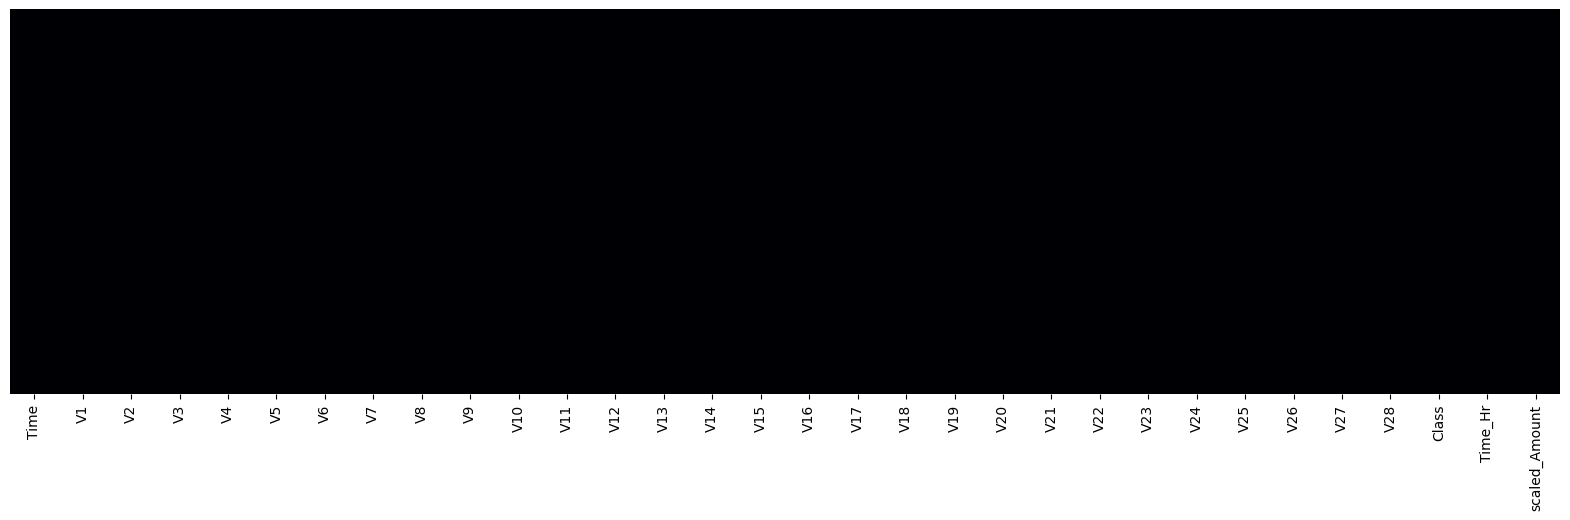

In [98]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma');

In [92]:
df.dropna(inplace=True)

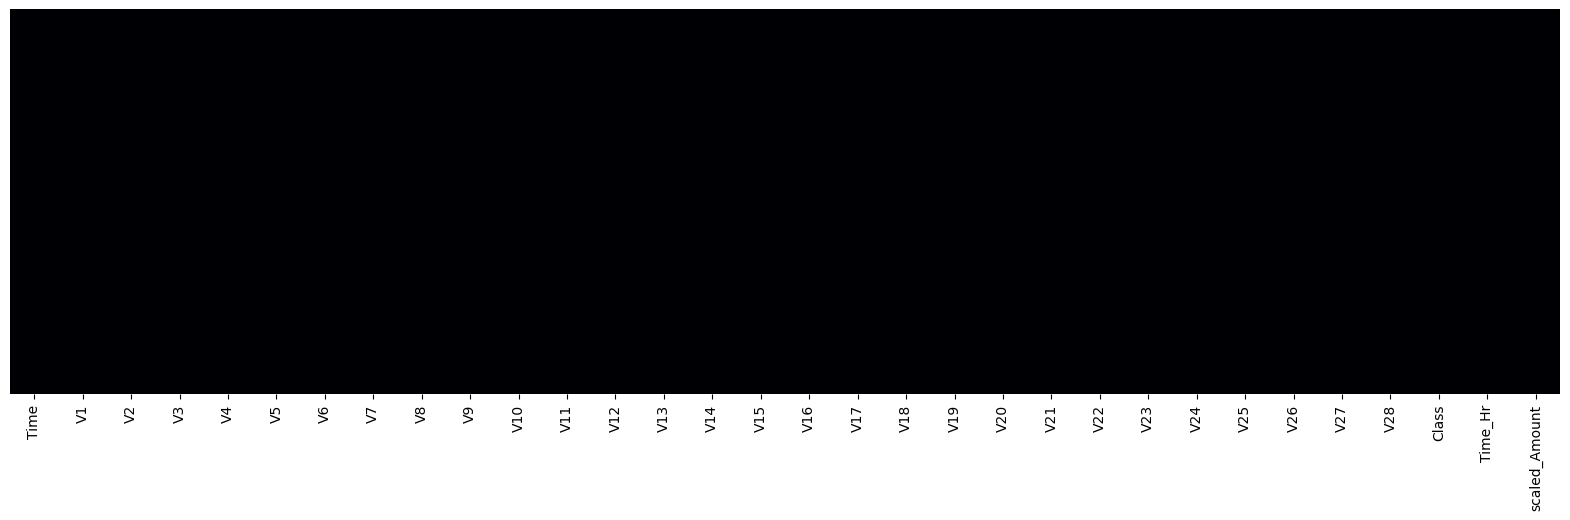

In [99]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma');

Class as pie chart:


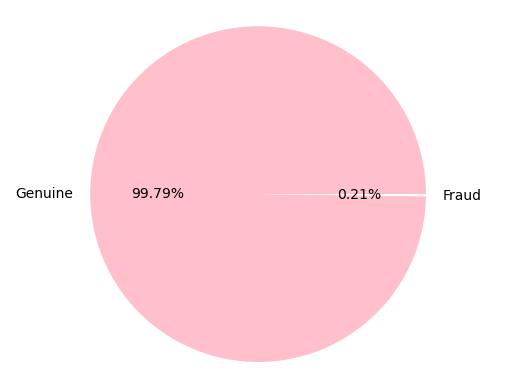

In [71]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.2f%%', labels=['Genuine','Fraud'], colors=['pink','white'])
plt.axis('equal')
plt.ylabel('');

> Conversion of Time in Hours

In [33]:
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].head(5))

0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: Time_Hr, dtype: float64


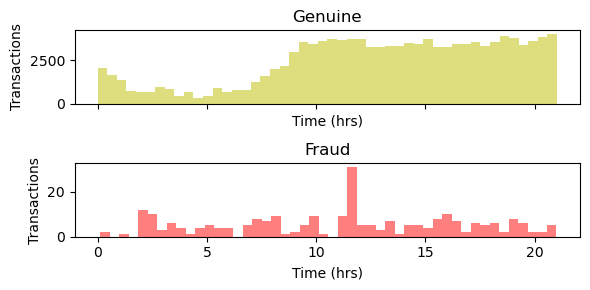

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='y',alpha=0.5)
ax1.set_title('Genuine')
ax1.set_xlabel('Time (hrs)')
ax1.set_ylabel('Transactions')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
ax2.set_xlabel('Time (hrs)')
ax2.set_ylabel('Transactions')
plt.tight_layout();

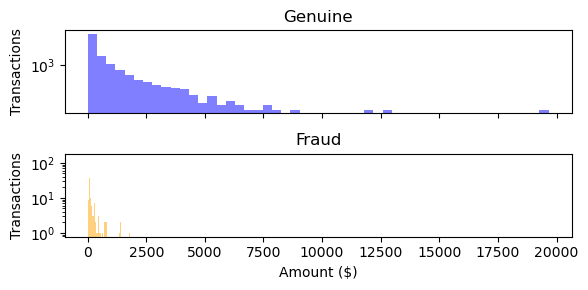

In [46]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='blue',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('Transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='orange',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('Transactions')
plt.tight_layout();

# Scaling The Data

In [49]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

In [66]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Time_Hr', 'scaled_Amount'],
      dtype='object')

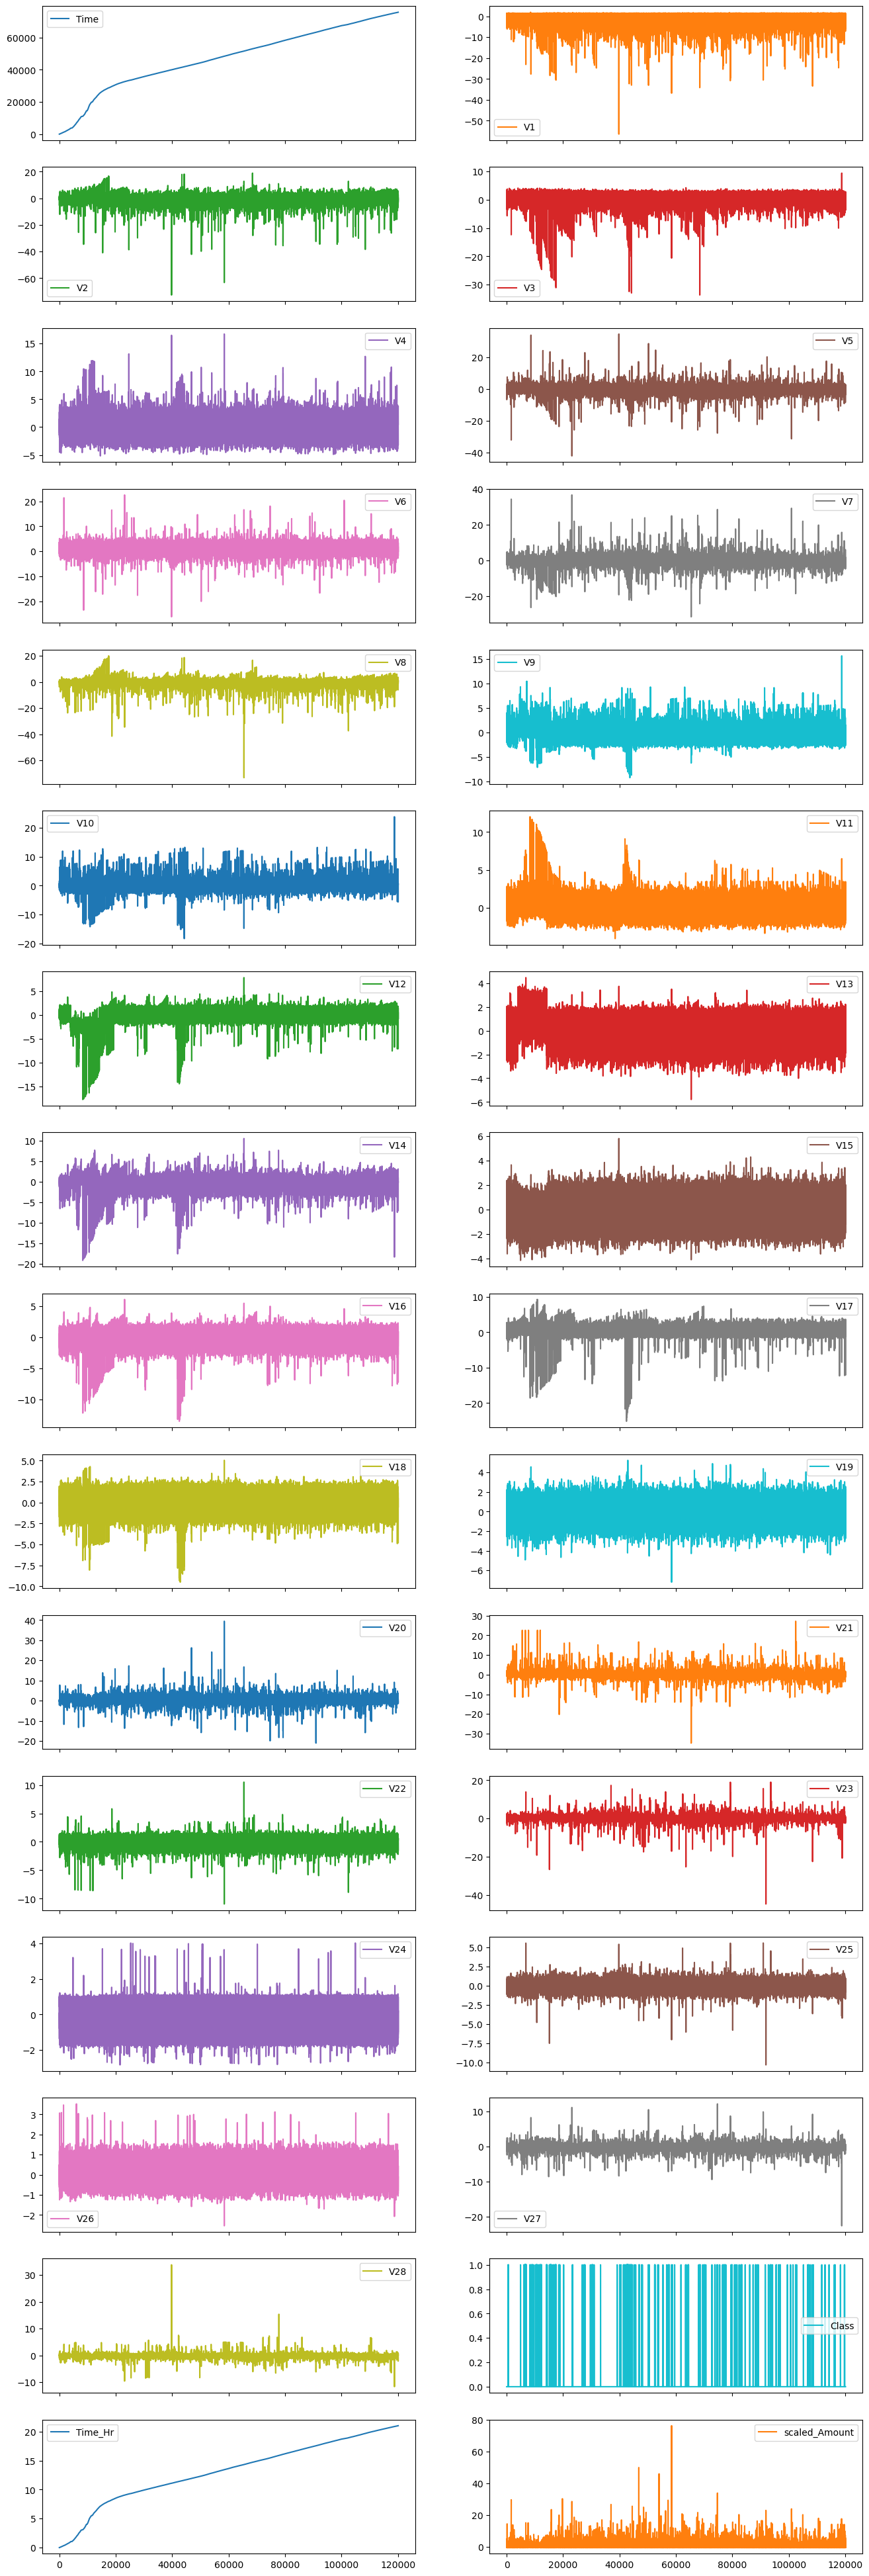

In [68]:
df.plot(kind='line',subplots=True,layout=(16,2),figsize=(16,50));

In [88]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.000000,0.215752
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,0.000000,-0.357812
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,0.000278,1.109845
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.000278,0.113788
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.000556,-0.095096


> Spliting the Data

In [103]:
X=df.drop('Class',axis=1)
y=df['Class']

# Training Model

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
naive = GaussianNB()

In [108]:
naive.fit(X_train,y_train)

GaussianNB()

In [109]:
predict=naive.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,classification_report

In [114]:
print('Classification Report :\n\n',classification_report(y_test,predict))

Classification Report :

               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     39538
         1.0       0.13      0.83      0.22        96

    accuracy                           0.99     39634
   macro avg       0.56      0.91      0.61     39634
weighted avg       1.00      0.99      0.99     39634



In [123]:
print('Accuracy Score :',accuracy_score(y_test,predict)*100,'%\n')
print('Confusion matrix :\n\n',confusion_matrix(y_test,predict))

Accuracy Score : 98.60725639602362 %

Confusion matrix :

 [[39002   536]
 [   16    80]]


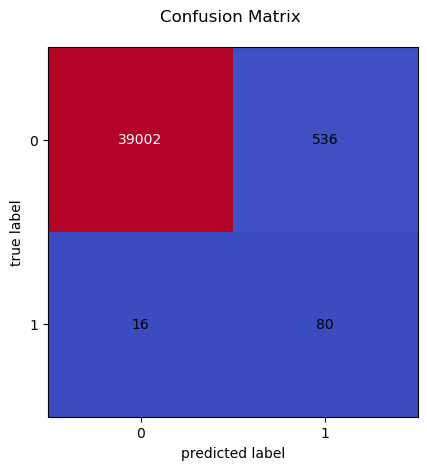

In [122]:
from mlxtend.plotting import plot_confusion_matrix
fig = plot_confusion_matrix(confusion_matrix(y_test,predict),cmap='coolwarm')
plt.title('Confusion Matrix \n');